In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\nk424\OneDrive\Scans\Desktop\training\Sample_Data\placement.csv")
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


C:\Users\nk424\AppData\Local\Temp\ipykernel_19224\4260214945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\nk424\AppData\Local\Temp\ipykernel_19224\4260214945.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


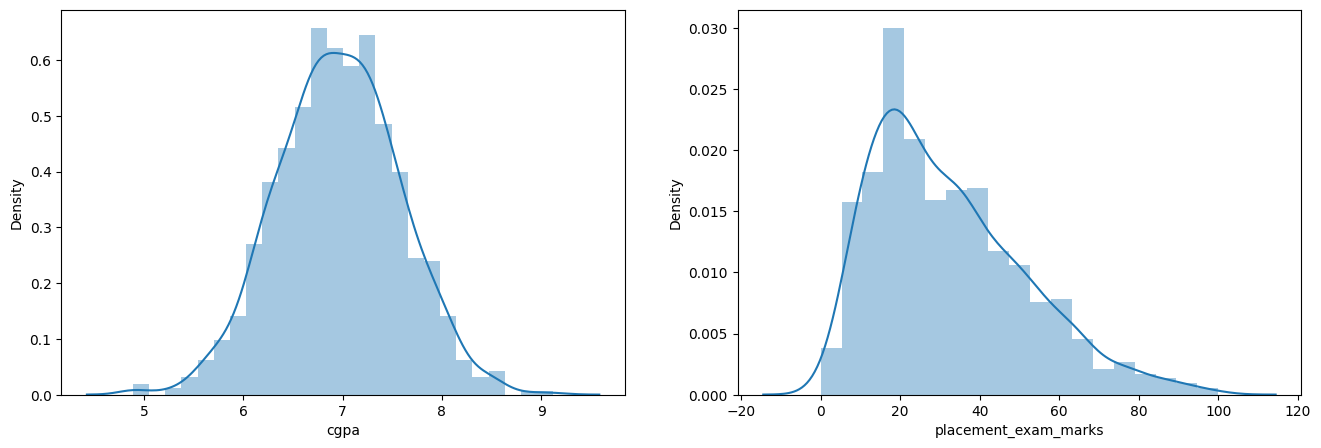

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [4]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [5]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
upper_limit

np.float64(8.808933625397168)

In [6]:
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
lower_limit

np.float64(5.113546374602832)

In [7]:
# Findiing outliers
df[(df['cgpa']>8.808933625397168 ) | (df['cgpa']<5.113546374602832)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


TRIMMING method

In [8]:
# Removal of Outliers
# 1.TRIMMING=>we will set a range 
new_df=df[(df['cgpa']<8.808933625397168) | (df['cgpa']>5.113546374602832)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
# 2.using Z_square
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [10]:
df['cgpa_zscore'].describe()

count    1.000000e+03
mean    -1.474376e-16
std      1.000000e+00
min     -3.362960e+00
25%     -6.677081e-01
50%     -2.013321e-03
75%      6.636815e-01
max      3.505062e+00
Name: cgpa_zscore, dtype: float64

In [11]:
new_df=df[(df['cgpa']<3.505062) | (df['cgpa']>-3.362960)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


CAPPING METHOD


In [12]:
lower_limit

np.float64(5.113546374602832)

In [13]:
upper_limit

np.float64(8.808933625397168)

In [14]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [15]:
df.shape

(1000, 4)

In [16]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

<!-- if distribution is positive and negative skewd then we use IQR method to find outliers -->

placement_exam_marks (if the distribution is left and right then we use IQR method to find outliers)

In [17]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

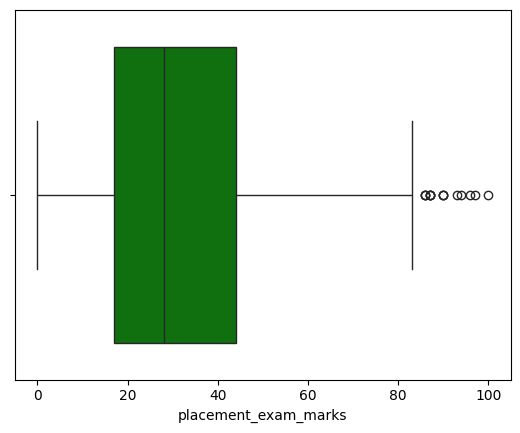

In [18]:
sns.boxplot(df['placement_exam_marks'],orient='h',color='g')

In [19]:
# FINDING THE IQR
Q1=df['placement_exam_marks'].quantile(0.25)
Q2=df['placement_exam_marks'].quantile(0.50)
Q3=df['placement_exam_marks'].quantile(0.75)
print(Q1,Q2,Q3)

17.0 28.0 44.0


In [20]:
# calculate IQR
IQR=Q3-Q1
print(IQR)

27.0


In [21]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(f"upper_limit:{upper_limit}")
print(f"lower_limit:{lower_limit}")

upper_limit:84.5
lower_limit:-23.5


In [22]:
# Finding Outliers
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [23]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


In [24]:
# Trimming
new_df=df[df['placement_exam_marks']<upper_limit]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [25]:
new_df.shape

(985, 4)

C:\Users\nk424\AppData\Local\Temp\ipykernel_19224\3701863299.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\nk424\AppData\Local\Temp\ipykernel_19224\3701863299.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


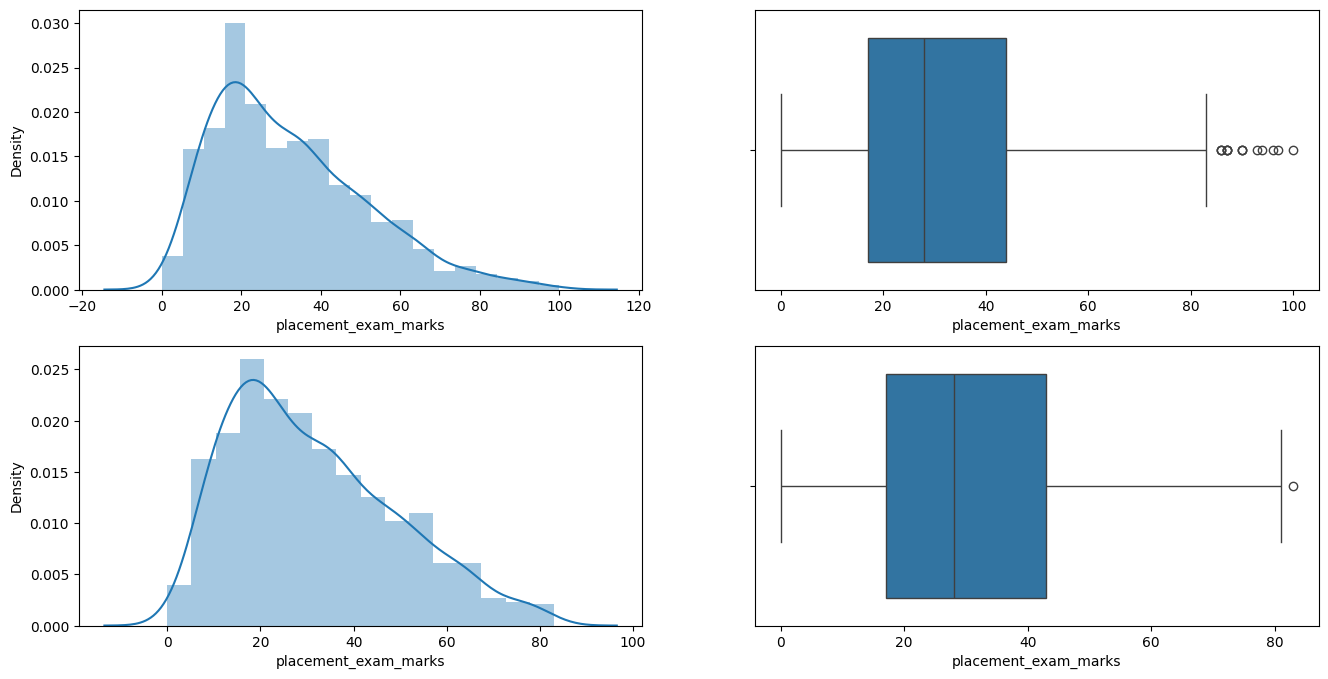

In [28]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')
plt.show()